## CNN classifier for the planesnet data

In [ ]:
## import packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.regularizers import l2, l1
import math


In [ ]:
## Mount drive folder
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Read data in json format
data = pd.read_json('/content/drive/MyDrive/CommonFiles/MUSA650-Data/planesnet.json')

In [ ]:
## View the dataframe
data.head()

,data,labels,locations,scene_ids
0,"[206, 195, 187, 183, 177, 175, 174, 193, 198, ...",1,"[-118.40497658522878, 33.940618514147936]",20170620_175442_0e30
1,"[215, 209, 200, 196, 192, 197, 205, 168, 155, ...",1,"[-122.392469714, 37.6176425378]",20161212_180859_0e30
2,"[204, 214, 220, 219, 213, 205, 198, 193, 199, ...",1,"[-122.397578597, 37.6209247852]",20170524_181349_0e2f
3,"[179, 174, 179, 178, 173, 170, 168, 168, 168, ...",1,"[-122.214849831, 37.7203378331]",20161110_180707_0e1f
4,"[222, 222, 218, 214, 208, 205, 207, 206, 206, ...",1,"[-117.862173435, 33.6796854072]",20160813_184932_0c64


In [ ]:
## Read image data into a 2D matrix
X = np.array(data.data.tolist())
X.shape

(32000, 1200)

In [ ]:
## Reshape the image data to 20x20 image patches with 3 channels (RGB)
X = X.reshape(32000, 3, 20, 20)
X.shape

(32000, 3, 20, 20)

In [ ]:
## Standard format for RGB is "the channels at the end"; move the axis for channels to the end
X = np.moveaxis(X, 1, 3)
X.shape

(32000, 20, 20, 3)

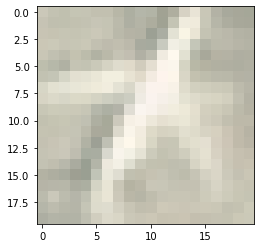

In [ ]:
## View few images
tmpI = X[46,:,:,:]
plt.imshow(tmpI)
plt.show()

In [ ]:
## Read the labels
y = np.array(data['labels'])
y.shape

(32000,)

In [ ]:
## Split the data into training ans testing sets
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.20)

## Scale the data
scalar = MinMaxScaler()
scalar.fit(X_tr.reshape(X_tr.shape[0], -1))
X_tr = scalar.transform(X_tr.reshape(X_tr.shape[0], -1)).reshape(X_tr.shape)
X_te = scalar.transform(X_te.reshape(X_te.shape[0], -1)).reshape(X_te.shape)

In [ ]:
## Show data size
print(X_tr.shape)
print(y_tr.shape)
print(X_te.shape)
print(y_te.shape)

(25600, 20, 20, 3)
(25600,)
(6400, 20, 20, 3)
(6400,)


In [ ]:
## Get the shape of a single sample
dshape = X_tr.shape[1:]
dshape

(20, 20, 3)

In [ ]:
## Construct the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1,1), input_shape=dshape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 18, 18, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 18, 18, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 32)         1

In [ ]:
## Compile the model
OPT = Adam(learning_rate=0.0001)
NUM_EPOCH = 15
B_SIZE = 64
model.compile(loss='binary_crossentropy', optimizer=OPT, metrics=['accuracy'])


In [ ]:
## Train the model
mdl_tr = model.fit(X_tr, y_tr, batch_size=B_SIZE, epochs=NUM_EPOCH, shuffle=True, validation_data=(X_te, y_te))


Epoch 1/15
400/400 [==============================] - 19s 44ms/step - loss: 0.3205 - accuracy: 0.8585 - val_loss: 0.7776 - val_accuracy: 0.7542
Epoch 2/15
400/400 [==============================] - 16s 40ms/step - loss: 0.1881 - accuracy: 0.9271 - val_loss: 0.1466 - val_accuracy: 0.9458
Epoch 3/15
400/400 [==============================] - 16s 40ms/step - loss: 0.1545 - accuracy: 0.9420 - val_loss: 0.1438 - val_accuracy: 0.9456
Epoch 4/15
400/400 [==============================] - 21s 52ms/step - loss: 0.1347 - accuracy: 0.9498 - val_loss: 0.1248 - val_accuracy: 0.9536
Epoch 5/15
400/400 [==============================] - 21s 53ms/step - loss: 0.1224 - accuracy: 0.9544 - val_loss: 0.1179 - val_accuracy: 0.9592
Epoch 6/15
400/400 [==============================] - 16s 40ms/step - loss: 0.1120 - accuracy: 0.9591 - val_loss: 0.1039 - val_accuracy: 0.9628
Epoch 7/15
400/400 [==============================] - 17s 41ms/step - loss: 0.1031 - accuracy: 0.9619 - val_loss: 0.1323 - val_accuracy:

Text(0.5, 0, 'epochs')

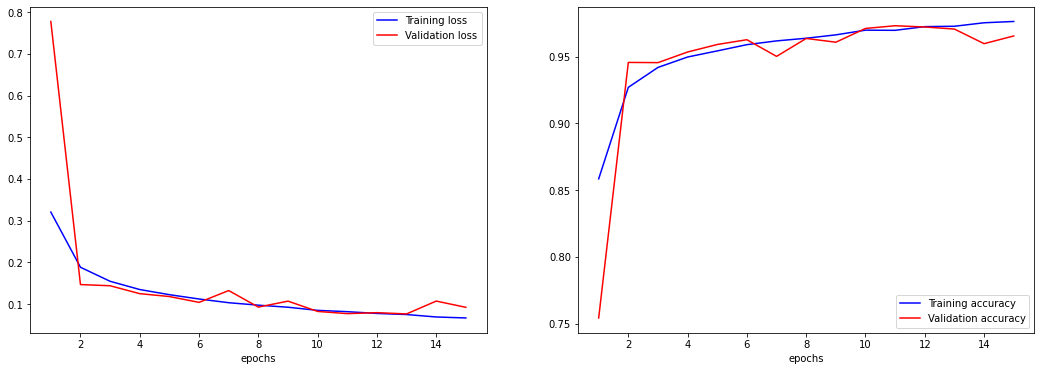

In [ ]:
## Plot the learning stats
fig, ax = plt.subplots(1,2, figsize=[18,6])
ax[0].plot(range(1, NUM_EPOCH+1), mdl_tr.history['loss'], c='blue', label='Training loss')
ax[0].plot(range(1, NUM_EPOCH+1), mdl_tr.history['val_loss'], c='red', label='Validation loss')
ax[0].legend()
ax[0].set_xlabel('epochs')

ax[1].plot(range(1, NUM_EPOCH+1), mdl_tr.history['accuracy'], c='blue', label='Training accuracy')
ax[1].plot(range(1, NUM_EPOCH+1), mdl_tr.history['val_accuracy'], c='red', label='Validation accuracy')
ax[1].legend()
ax[1].set_xlabel('epochs')
